In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
#Query the 'Measurement' table with the column 'date'
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [13]:
import datetime as dt

In [50]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
precipitation_query = []
precipitation_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()
#print(precipitation_query)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation_query, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)
print(df)

# Sort the dataframe by date
df= df.sort_index()

#Drop the null values from the DataFrame
precipitation_df = df.dropna()
print(precipitation_df)




Query Date:  2016-08-23
                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]
                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-23  2016-08-23           1.79
2016-08-23  2016-08-23           0.05
2016-08-23  2016-08-23           0.15
2016-08-23  2016-08-23           0.70
...                ...            ...
2017-08-22  2017-08-22           0.00
2017-08-23  2017-08-23           0.00
2017-08-23  2017-08-23           0.00
2017-08-23  2017-08-23           0.08
2

In [51]:
import matplotlib.dates as mdates

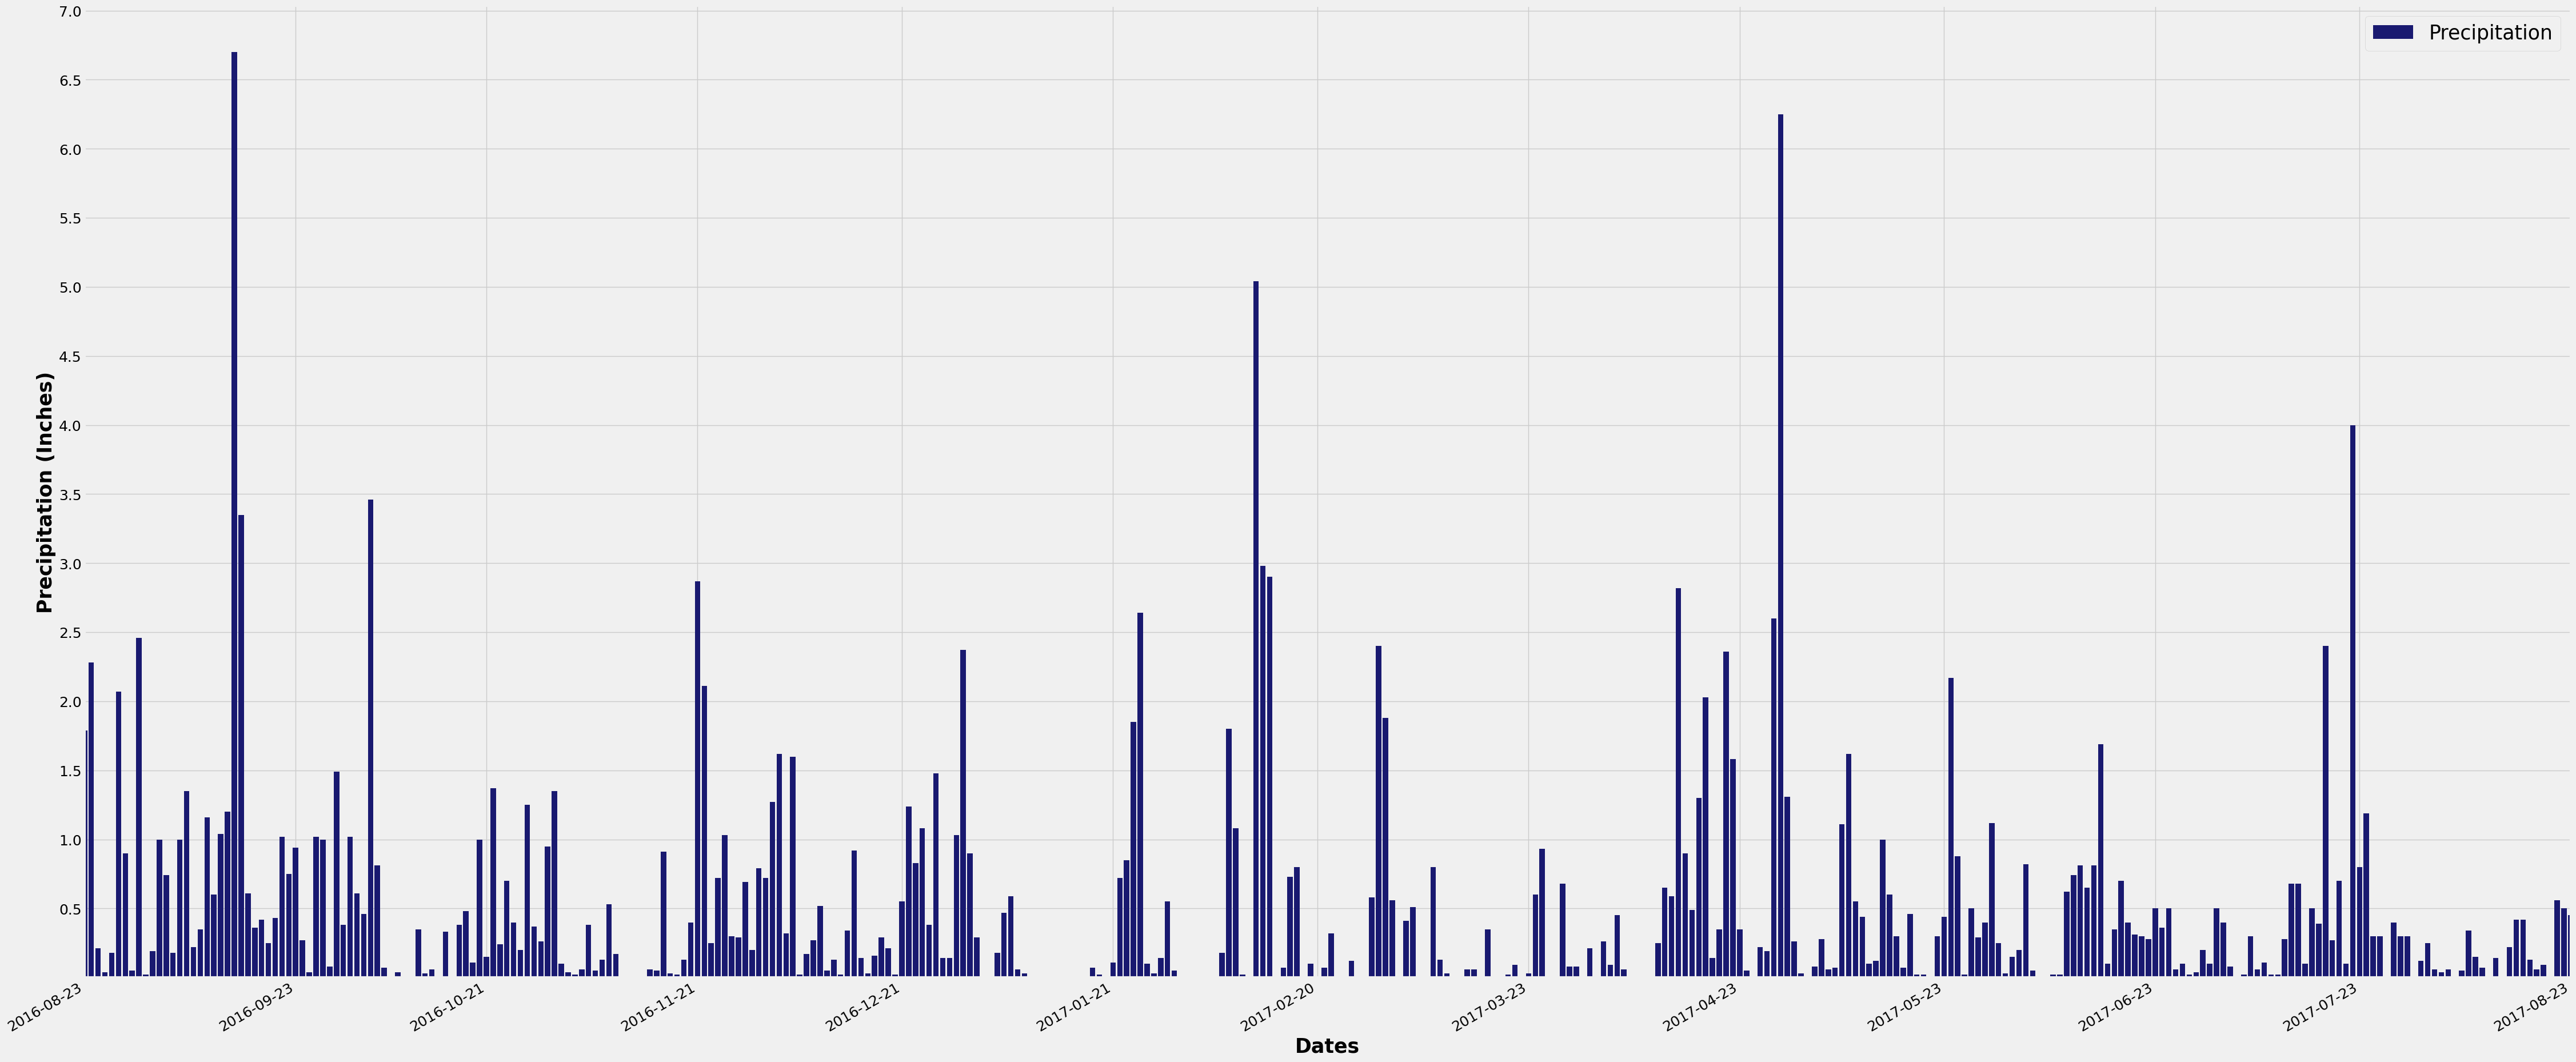

In [52]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.figure(figsize= (50, 25))
plt.bar(precipitation_df['date'], precipitation_df['precipitation'], color='midnightblue', label= "Precipitation")
plt.xticks(precipitation_df['date'], rotation=90, fontsize= 18)
plt.yticks(np.arange(0.5, 7.5, 0.5), fontsize = 18)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.xlim("2016-08-23", "2017-08-23")
plt.xlabel("Dates", fontsize= 25, fontweight= 'bold')
plt.ylabel("Precipitation (Inches)", fontsize = 25, fontweight = 'bold')
plt.legend(fontsize=25, loc="upper right")

In [53]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [56]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station).distinct().count()
print(station_count)

9


In [59]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [64]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= query_date).all()
#Save results to a dataframe that will be used to make the histogram
temperature_df = pd.DataFrame(temperature_results, columns=['tobs'])
print(temperature_df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


Text(0.5, 0, 'Temperature')

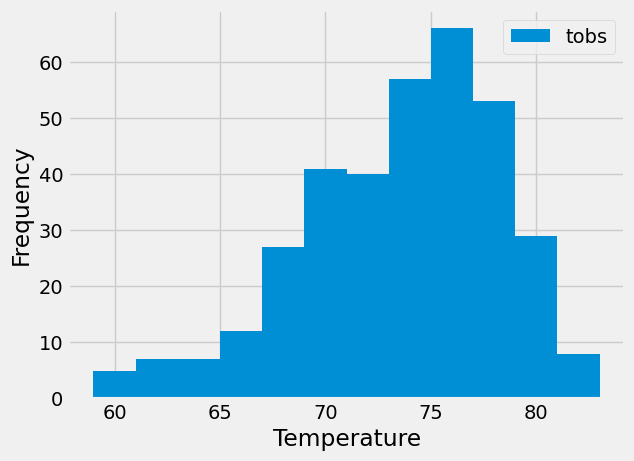

In [66]:
#Create histogram
temperature_df.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close session

In [ ]:
# Close Session
session.close()